In [141]:
from cProfile import label

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from babel.dates import time_

from matplotlib import interactive

interactive(True)


# Step 1: Read the .txt file
def read_txt_to_dataframe(file_path, sep=None):
    """
    Reads a .txt file and converts it to a pandas DataFrame.
    
    Parameters:
        file_path (str): Path to the .txt file.
        sep (str): Delimiter used in the file (e.g., ',' for CSV, '\t' for tab-separated).
                   If None, pandas will infer the delimiter automatically.
    Returns:
        pd.DataFrame: The resulting DataFrame.
    """
    try:
        # Read the file into a DataFrame
        df = pd.read_csv(file_path, sep=sep, engine='python')
        print("Data Loaded Successfully!")
        #print(df.head())  # Display the first few rows
        return df
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

# Step 2: Plot the DataFrame
def plot_dataframe(df, x_col, y_col, title="Plot", xlabel="X-axis", ylabel="Y-axis", color ='black', label = ""):
    """
    Plots two columns from a DataFrame.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        x_col (str): Name of the column for the x-axis.
        y_col (str): Name of the column for the y-axis.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        color (str): color of the y-axis name and the plot.
        label (str): Label for the y-axis.
    """
    try:
        plt.figure()
        plt.plot(df[x_col], df[y_col], color = color, label = label)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel, color = color)
        plt.grid(True)
        if label != "": 
            plt.legend([label], loc = 'best')
        plt.show()
    except KeyError as e:
        print(f"Error: {e} - Make sure the column names are correct.")
    except Exception as e:
        print(f"Error: {e}")
        
# Plot two y-col from DataFram
def plot_dataframeBoth(df, x_col, y1_col, y2_col, title="Plot", xlabel="X-axis", ylabel="Y-axis",ylabel2="Y-axis2", color ='black',color2 = 'white'):
    """
    Plots two columns from a DataFrame.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        x_col (str): Name of the column for the x-axis.
        y_col (str): Name of the column for the y-axis.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis
        
        color (str): color of the y-axis name and the plot.
    """
    try:
        fig, ax1 = plt.subplots()
        ax1.set_ylabel(ylabel, color= color)
        ax1.set_xlabel(xlabel)
        #ax1.set_ylim(-120, 700)
        
        plotCurrent = ax1.plot(df[x_col], df[y1_col], color= color, label='$V_{DS}$')
        
        ax2 = ax1.twinx()
        ax2.set_ylabel(ylabel2, color= color2)
        #ax2.set_ylim(-120,700)
        
        plotVoltage = ax2.plot(df[x_col], df[y2_col], color='red', label='$I_D$')
        
        Ins = plotVoltage + plotCurrent
        labels = [I.get_label() for I in Ins]
        
        plt.legend(Ins, labels, loc=5)
        plt.show()
    except KeyError as e:
        print(f"Error: {e} - Make sure the column names are correct.")
    except Exception as e:
        print(f"Error: {e}")

In [133]:
# define filePath

filePath = "/Users/timowurmback/localDokument/Messung_DPT/SimulationSnubber/RDC_01/sim/DPTest_snubber_RDC_3.txt"

In [144]:
# Step 3: Main function
if __name__ == "__main__":
    file_path = filePath 
    delimiter = '\t'  # Set the delimiter if known (e.g., ',' or '\t')

    # Load the data into a DataFrame
    df = read_txt_to_dataframe(file_path, sep=delimiter)
    
    df['time'] = df['time'] * 1000000
    display(df)

Data Loaded Successfully!


,time,"V(N006,N009)",Ix(U1:D1)
0,0.000000,400.0000,1.675343e-07
1,0.001172,400.0000,1.675179e-07
2,0.002344,400.0000,1.675148e-07
3,0.002637,400.0000,1.675145e-07
4,0.003223,400.0000,1.675134e-07
...,...,...,...
5980,105.184925,402.0807,-3.042477e-07
5981,105.295778,402.0807,-3.041764e-07
5982,105.412965,402.0807,-3.040904e-07
5983,119.944215,402.0781,-3.035481e-07


Available columns: Index(['time', 'V(N006,N009)', 'Ix(U1:D1)'], dtype='object')


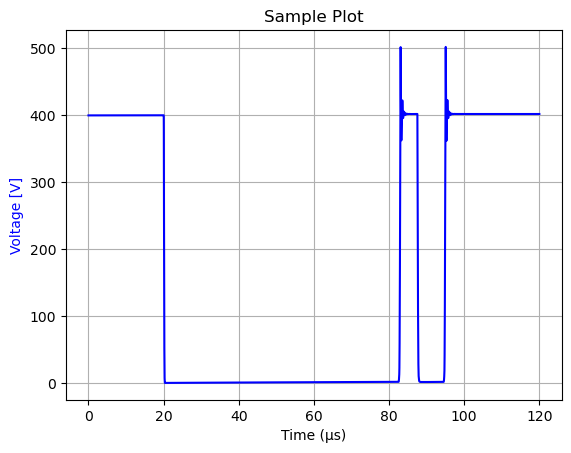

In [135]:
# If data loaded successfully, plot the data

if df is not None:
    print("Available columns:", df.columns)
    # Replace 'Column1' and 'Column2' with your actual column names
    plot_dataframe(df, x_col="time", y_col="V(N006,N009)",
                   title="Sample Plot", xlabel="Time (µs)", ylabel="Voltage [V]", color ='blue')

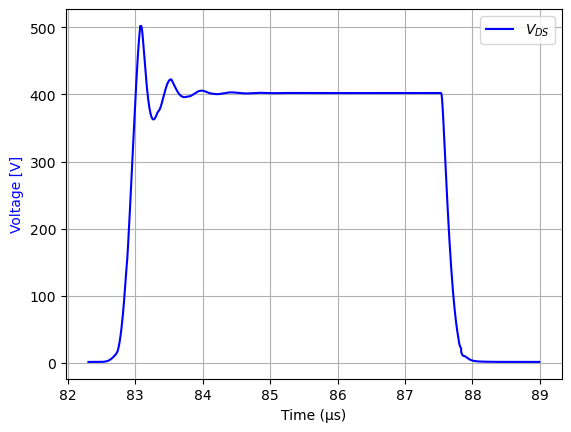

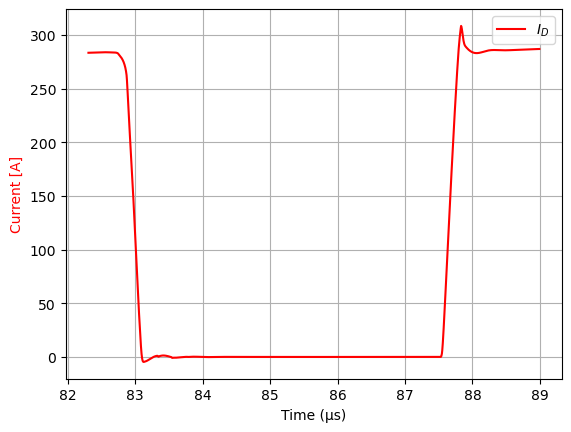

In [136]:
# filter df if necessary 

df_dptC = df[df['time'].apply(lambda x: 80 <= x <= 89)]

plot_dataframe(df_dptC, x_col="time", y_col="V(N006,N009)",
               title="", xlabel="Time (µs)", ylabel="Voltage [V]", color ='blue', label= "$V_{DS}$")
plot_dataframe(df_dptC, x_col="time", y_col="Ix(U1:D1)",
               title="", xlabel="Time (µs)", ylabel="Current [A]", color ='red', label= '$I_D$')

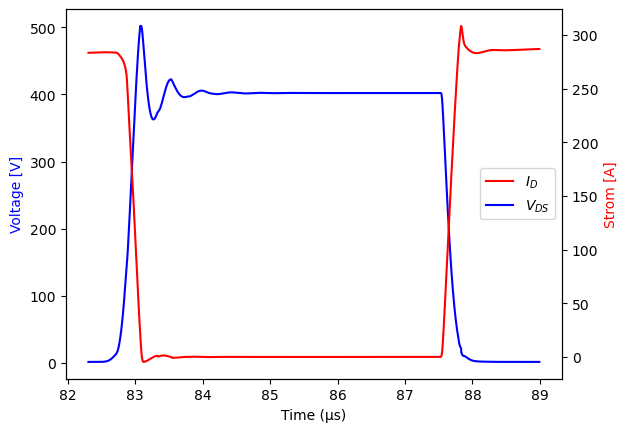

In [137]:
# both in one picture

plot_dataframeBoth(df_dptC,x_col="time", y1_col="V(N006,N009)", y2_col="Ix(U1:D1)", title="Sample Plot", xlabel="Time (µs)", ylabel="Voltage [V]", ylabel2= 'Strom [A]', color ='blue', color2= 'red')